## Jack's Car Rental - Original
Example 4.2 of the book.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import math

## Initialization

In [2]:
# Technically, there will be infinite s', but we limited it to 20.

SIZE = 20
states = np.zeros((SIZE+1,SIZE+1)) # Given a pair of state, what is its state value?
policy = np.zeros((SIZE+1,SIZE+1)) # Given a pair of state, what is the action to take? (Always deterministic)
theta = 0.1 # Greatly affect the calculation speed
gamma = 0.9

LAM_REQ1, LAM_REQ2, LAM_RET1, LAM_RET2 = 3,4,3,2

# No need for 0 - 20, because the pmf is really low.
REQ1_MAX = 9
REQ2_MAX = 11
RET1_MAX = 9
RET2_MAX = 7

In [3]:
# Expensive to calculate at every run - cache the results for given lambda.
poisson_cache = {}

def poisson_pmf(lam, n):
    key = (lam, n)
    if key not in poisson_cache:
        poisson_cache[key] = math.exp(-lam) * lam**n / math.factorial(n)
    return poisson_cache[key]

def precompute_poisson():
    for n in range(max(REQ1_MAX, RET1_MAX)):
        poisson_pmf(LAM_REQ1, n)
        poisson_pmf(LAM_RET1, n)
    for n in range(max(REQ2_MAX, RET2_MAX)):
        poisson_pmf(LAM_REQ2, n)
        poisson_pmf(LAM_RET2, n)

## Evaluation

In [4]:
def gather_value(state, action):
    s1, s2 = state

    # Optimization: since (s,a) does not change, we could calculate 
    # 1. part of the "new state" (the action part, not including the return)
    # 2. part of reward (the -2 part)
    # 3. pre-compute and cache the poisson calculations

    s1_prime, s2_prime = min(20, max(0, s1-action)), min(20, max(0, s2+action))
    v_s = -2 * abs(action)

    # Use fixed bounds covering Poisson distributions
    for req1 in range(REQ1_MAX):
        for req2 in range(REQ2_MAX):
            for ret1 in range(RET1_MAX):
                for ret2 in range(RET2_MAX):

                    p = calculate_prob(req1, req2, ret1, ret2)

                    rent1, rent2 = min(req1, s1_prime), min(req2, s2_prime)
                    reward = (rent1 + rent2) * 10
                    new_s1 = max(min(s1_prime - rent1 + ret1, 20),0)
                    new_s2 = max(min(s2_prime - rent2 + ret2, 20),0)
                    
                    v_s += p * (reward + gamma * states[int(new_s1), int(new_s2)])
    return v_s

# The probability of the request and return values
def calculate_prob(req1, req2, ret1, ret2):
    p1 = poisson_pmf(LAM_REQ1, req1)
    p2 = poisson_pmf(LAM_REQ2, req2)
    p3 = poisson_pmf(LAM_RET1, ret1)
    p4 = poisson_pmf(LAM_RET2, ret2)
    return p1 * p2 * p3 * p4

In [5]:
def policy_evaluation():
    break_loop = False
    while not break_loop:
        change = 0
        for i in range(SIZE+1):
            for j in range(SIZE+1):
                prev_state = states[i,j]
                states[i,j] = gather_value([i,j], policy[i,j]) 
                change = max(change, abs(prev_state - states[i,j]))
        if change < theta:
            break_loop = True

## Improvement

In [6]:
def determine_action(state):
    max_value, max_action = -math.inf, 0
    for action in range(-5, 6):
        if not feasible(state, action):
            continue
        value = gather_value(state, action)
        if value > max_value:
            max_action = action
            max_value = value
    return max_action

def feasible(state, action):
    s1, s2 = state
    a = abs(action)
    return (
        (action > 0 and s1 >= a and s2 + a <= 20) or
        (action <= 0 and s2 >= a and s1 + a <= 20)
    )


In [7]:
def policy_improvement():
    policy_stable = True
    for i in range(SIZE+1):
        for j in range(SIZE+1):
            old_action = policy[i,j]
            policy[i,j] = determine_action([i,j])
            if policy[i,j] != old_action:
                policy_stable = False

    if policy_stable:
        print("Iteration complete! ", states, policy)
        return True
    return False

In [8]:
def show_graph(graph):
    # Create custom colormap matching the screenshot
    colors = [
        '#1a2c7b', '#2a4ca7', '#3a7bb7', '#5aa8c8', '#8ad2d1',
        '#c8e6be', '#f6f9c4', '#f9d77c', '#f9a76a', '#f86a5a', '#e93a4a'
    ]
    cmap = ListedColormap(colors)

    # Create plot
    plt.figure(figsize=(6, 6))
    plt.imshow(graph, cmap=cmap, vmin=-5, vmax=5, origin='lower', extent=[0, 20, 0, 20])
    plt.colorbar(ticks=range(-5, 6), label='Cars moved')
    plt.xlabel('Cars at location 2')
    plt.ylabel('Cars at location 1')
    plt.title('Optimal Policy')
    plt.show()

Start iteration:  1
finished iteration  0
finished iteration  1
finished iteration  2
finished iteration  3
finished iteration  4
finished iteration  5
finished iteration  6
finished iteration  7
finished iteration  8
finished iteration  9
finished iteration  10
finished iteration  11
finished iteration  12
finished iteration  13
finished iteration  14
finished iteration  15
finished iteration  16
finished iteration  17
finished iteration  18
finished iteration  19
finished iteration  20
finished iteration  21
finished iteration  22
finished iteration  23
finished iteration  24
finished iteration  25
finished iteration  26
finished iteration  27
finished iteration  28
finished iteration  29
finished iteration  30
finished iteration  31
finished iteration  32
Finished iteration with policy:  [[ 0.  0.  0.  0.  0.  0.  0.  0. -1. -1. -2. -2. -2. -2. -3. -3. -3. -3.
  -3. -4. -4.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1. -1. -1. -1. -2. -2. -2. -2. -2.
  -3. -3. -3.]
 [ 0.  0.  0.  0.  0

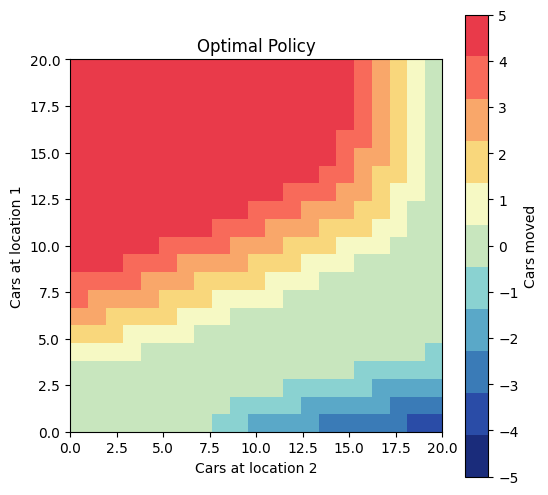

Start iteration:  2
finished iteration  0
finished iteration  1
finished iteration  2
finished iteration  3
finished iteration  4
finished iteration  5
finished iteration  6
finished iteration  7
finished iteration  8
finished iteration  9
finished iteration  10
finished iteration  11
finished iteration  12
finished iteration  13
finished iteration  14
finished iteration  15
finished iteration  16
Finished iteration with policy:  [[ 0.  0.  0.  0.  0.  0.  0. -1. -1. -2. -2. -2. -2. -3. -3. -3. -3. -3.
  -4. -4. -4.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1. -1. -1. -1. -2. -2. -2. -2. -2. -3.
  -3. -3. -3.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1. -1. -1. -1. -1. -2. -2.
  -2. -2. -2.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1. -1. -1.
  -1. -1. -1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0. -1.]
 [ 1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 2.  2.  1.  1.  1.  0.  0.  0

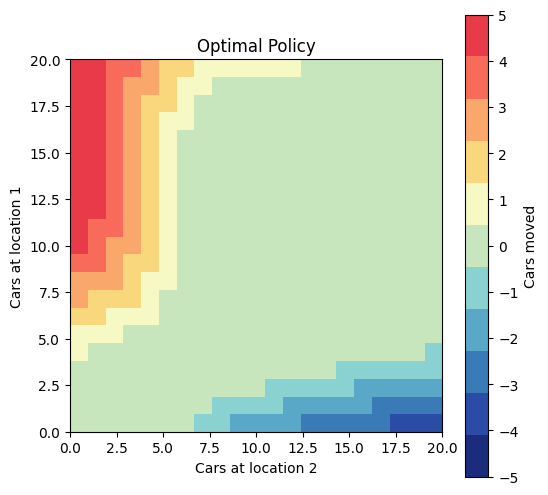

Start iteration:  3
finished iteration  0
finished iteration  1
finished iteration  2
finished iteration  3
finished iteration  4
finished iteration  5
finished iteration  6
finished iteration  7
finished iteration  8
finished iteration  9
finished iteration  10
Finished iteration with policy:  [[ 0.  0.  0.  0.  0.  0.  0. -1. -1. -2. -2. -2. -3. -3. -3. -3. -3. -4.
  -4. -4. -4.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1. -1. -1. -2. -2. -2. -2. -2. -3. -3.
  -3. -3. -3.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1. -1. -1. -1. -1. -2. -2. -2.
  -2. -2. -2.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1. -1. -1. -1.
  -1. -1. -2.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0. -1. -1.]
 [ 1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 2.  2.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 3.  2.  2.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  

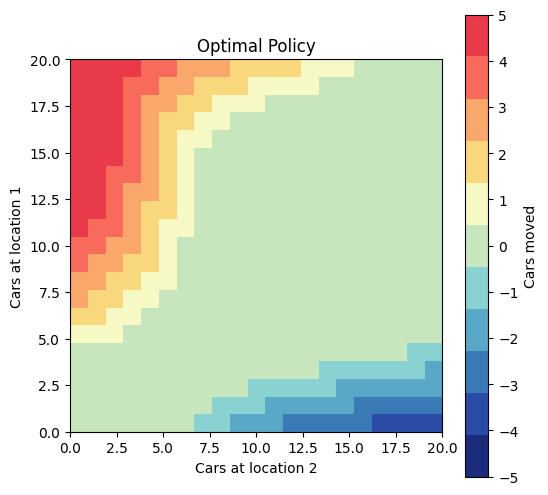

Start iteration:  4
finished iteration  0
finished iteration  1
finished iteration  2
finished iteration  3
Finished iteration with policy:  [[ 0.  0.  0.  0.  0.  0.  0. -1. -1. -2. -2. -2. -3. -3. -3. -3. -3. -4.
  -4. -4. -4.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1. -1. -1. -2. -2. -2. -2. -2. -3. -3.
  -3. -3. -3.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1. -1. -1. -1. -1. -2. -2. -2.
  -2. -2. -2.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1. -1. -1. -1.
  -1. -1. -2.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0. -1. -1.]
 [ 1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 2.  2.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 3.  2.  2.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 3.  3.  2.  2.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 4.  3.  3.  2.  2.  1.  0.  0.  0.  0.  0.  0.  0.  0. 

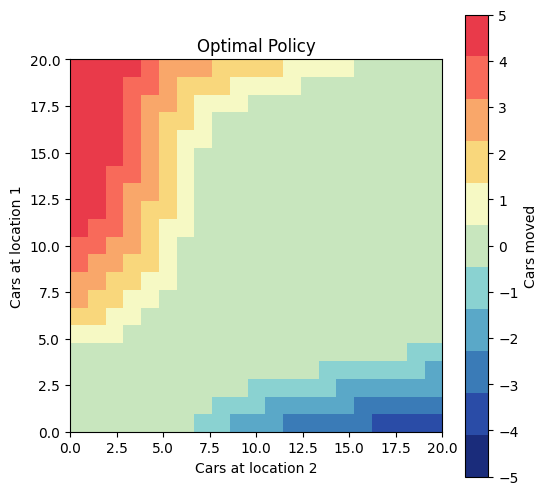

Start iteration:  5
finished iteration  0
Iteration complete!  [[355.65515232 365.47578839 375.16831649 384.58555763 393.59407446
  402.12082952 410.15410345 417.86231461 425.42270584 432.66019301
  439.77018497 446.48020023 452.87174072 459.17153149 465.12919068
  470.77369026 476.12621192 481.29201041 486.29119007 491.03033549
  495.51866329]
 [365.37330097 375.19424853 384.88711205 394.30397481 403.3110497
  411.83544342 419.86572398 427.42610713 434.66354581 441.77352487
  448.48352846 454.87447243 461.17425507 467.13190749 472.7764017
  478.1289192  483.29384796 488.29302584 493.03217019 497.52049732
  501.75370181]
 [374.66862012 384.48943616 394.18095968 403.59369409 412.59300775
  421.10631062 429.12310239 436.66843305 443.77839251 450.48838038
  456.87884522 463.17861893 469.13626581 474.78075714 480.13327341
  485.29719254 490.29637301 495.03552163 499.52385357 503.7570615
  507.70703932]
 [383.27536383 393.09526006 402.78233451 412.18381707 421.16327934
  429.64886997 437.63

In [ ]:
iter_count = 1
while True:
    print("Start iteration: ", iter_count)
    policy_evaluation()
    if policy_improvement():
        break
    show_graph(policy)
    iter_count += 1